In [ ]:
!pip install finance-datareader

In [ ]:
# S&P500 종목 리스트

import FinanceDataReader as fdr

sp500 = fdr.StockListing('SP500')
sp500

In [ ]:
def make_rate(code):
    df = fdr.DataReader(code,'2017')
    original = df[['Close']].iloc[0]
    df = df[['Close']] / original -1
    return df['Close']

In [ ]:
def final_rate(code):
	return make_rate(code).iloc[-1]

In [ ]:
sp500 = fdr.StockListing('SP500')
df = sp500[['Symbol','Name']].head(5)
df['rate'] = df['Symbol'].apply(final_rate)
df = df.sort_values(by='rate',ascending=False)
df

In [ ]:
df.set_index('Name', inplace=True)
df.plot(kind='bar')

In [ ]:
def final_rate(code):
  try:
    return make_rate(code).iloc[-1]
  except:
    return (-1000)

HTTP Error 404: Not Found  - symbol "BRKB" not found or invalid periods
HTTP Error 404: Not Found  - symbol "BFB" not found or invalid periods


<Axes: xlabel='Name'>

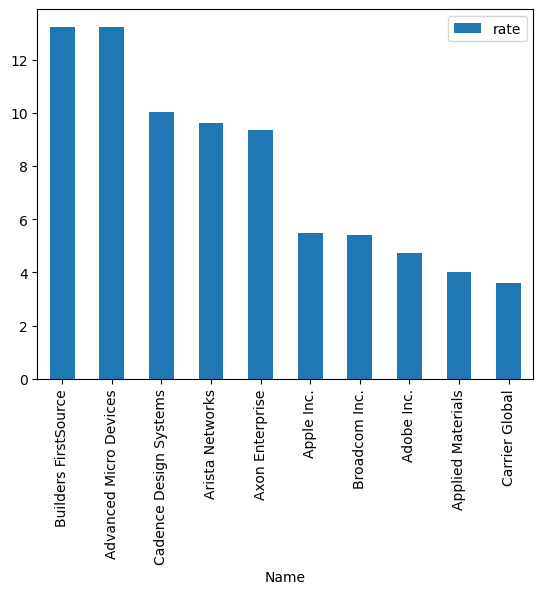

In [8]:
# 수익률 바차트

df = fdr.StockListing('SP500')

df = df[['Symbol','Name']].head(100)

df['rate'] = df['Symbol'].apply(final_rate)

cond = df['rate'] > -50
df = df[cond]

df = df.sort_values(by='rate',ascending=False).head(10)

df.set_index('Name',inplace=True)
df.plot(kind='bar')